In [1]:
%load_ext autoreload

In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..", "..")
MODULES_PATH = os.path.join(BASE_PATH, "modules")
METRICS_PATH = os.path.join(BASE_PATH, "metrics")

In [4]:
sys.path.append(MODULES_PATH)
sys.path.append(os.path.join(BASE_PATH, "tf_al"))

In [5]:
from tf_al import ExperimentSuitMetrics
from utils import MetricsTransformer, Frame, ExperimentFrame

In [6]:
from tf_al import ExperimentSuitMetrics
from utils import MetricsTransformer, Frame, ExperimentFrame

In [7]:
dtypes = {
    "run": int,
    "iteration": int,
    "train_time": float,
    "eval_sparse_categorical_crossentropy": float,
    "eval_sparse_categorical_accuracy": float,
    "query_time": float,
    "labeled_pool_size": int,
    "unlabeled_pool_size": int,
    "method": str
}

In [8]:
#train_loss train_sparse_categorical_accuracy train_time query_time eval_sparse_categorical_crossentropy eval_sparse_categorical_accuracy eval_time indices_selected iteration labeled_pool_size unlabeled_pool_size

In [9]:
base_experiment_path = os.path.join(METRICS_PATH, "temp_1")
metrics_handler = ExperimentSuitMetrics(base_experiment_path)
df_mp = MetricsTransformer.load_from_dir(metrics_handler, "moment_propagation", dtype=dtypes)

<AxesSubplot:xlabel='labeled_pool_size', ylabel='eval_sparse_categorical_accuracy'>

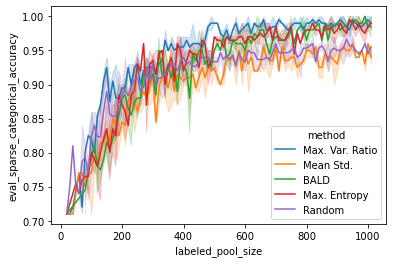

In [10]:
selector = df_mp["eval_sparse_categorical_accuracy"] > .7
sns.lineplot(data=df_mp[selector], x="labeled_pool_size", y="eval_sparse_categorical_accuracy", hue="method")

In [78]:
%autoreload 2
from tf_al.score import leff, qeff
mp_methods = Frame.split_by(df_mp, "method")
mp_methods = Frame.mean(mp_methods, "iteration", ["method"])

In [71]:
mp_mean = pd.concat(mp_methods)

<AxesSubplot:xlabel='labeled_pool_size', ylabel='eval_sparse_categorical_accuracy'>

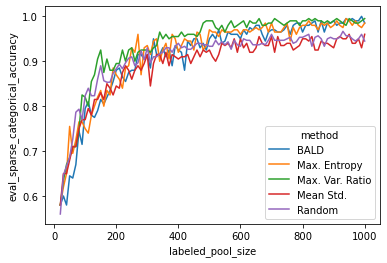

In [72]:
sns.lineplot(data=mp_mean, x="labeled_pool_size", y="eval_sparse_categorical_accuracy", hue="method")

In [132]:
bald_res = mp_methods[0]
rand_res = mp_methods[-1]
ratio_res = mp_methods[2]
entr_res = mp_methods[1]
std_res = mp_methods[3]

In [56]:
key = "eval_sparse_categorical_accuracy"
rand_acc = rand_res[key].to_numpy()
bald_acc = bald_res[key].to_numpy()
ratio_acc = ratio_res[key].to_numpy()
pool_size = bald_res["labeled_pool_size"]

bald_mean_leff, bald_std_leff = leff(bald_acc, rand_acc)
ratio_mean_leff, ratio_std_leff = leff(ratio_acc, rand_acc)
rand_mean_leff, rand_std_leff = leff(rand_acc, rand_acc)

In [57]:
accum = [bald_mean_leff[0]]
for val in bald_mean_leff[1:]:
    accum.append(accum[-1]+val)

In [62]:
df_bald_leff = pd.DataFrame({"leff": bald_mean_leff, "acc": bald_acc, "method": ["bald"]*len(bald_acc), "size": pool_size})
df_ratio_leff = pd.DataFrame({"leff": ratio_mean_leff, "acc": ratio_acc, "method": ["ratio"]*len(bald_acc), "size": pool_size})
df_random_leff = pd.DataFrame({"leff": rand_mean_leff, "acc": rand_acc, "method": ["random"]*len(rand_acc), "size": pool_size})

df_leff_test = pd.concat([df_bald_leff, df_ratio_leff, df_random_leff])

iteration
1      59870.0
2      59860.0
3      59850.0
4      59840.0
5      59830.0
        ...   
96     58920.0
97     58910.0
98     58900.0
99     58890.0
100    58880.0
Name: unlabeled_pool_size, Length: 100, dtype: float64

In [137]:
bald_qt = bald_res["query_time"].to_numpy()
rand_qt = rand_res["query_time"].to_numpy()
ratio_qt = ratio_res["query_time"].to_numpy()
std_qt = std_res["query_time"].to_numpy()
ent_qt = entr_res["query_time"].to_numpy()

In [141]:
pool_sizes = bald_res["unlabeled_pool_size"]
bald_mean = np.mean(bald_qt/pool_sizes)
rand_mean = np.mean(rand_qt/pool_sizes)
ratio_mean = np.mean(ratio_qt/pool_sizes)
ent_mean = np.mean(ent_qt/pool_sizes)

In [106]:
print("Times")
print("Ratios: ", ratio_mean)
print("Bald: ", bald_mean)
print("Random: ", rand_mean)

Times
Ratios:  0.00011220628071031985
Bald:  0.00015268572810579113
Random:  7.557685550409977e-07


In [111]:
rand_mean

7.557685550409977e-07

In [112]:
bald_qeff = (bald_mean-rand_mean)/bald_mean
ratio_qeff = (ratio_mean-rand_mean)/ratio_mean
ent_qeff = 

In [126]:
(bald_qeff/ratio_qeff)/2

0.5008989031139479

In [125]:
(ratio_qeff/bald_qeff)/2

0.4991027100395312

In [121]:
bald_qeff

0.9950501689685276

<AxesSubplot:xlabel='size', ylabel='leff'>

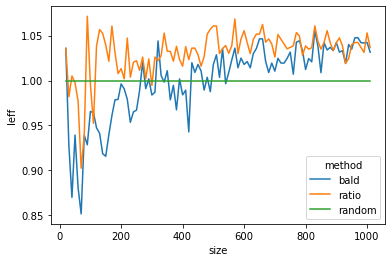

In [63]:
sns.lineplot(data=df_leff_test, x="size", y="leff", hue="method")

<AxesSubplot:xlabel='labeled_pool_size', ylabel='eval_sparse_categorical_accuracy'>

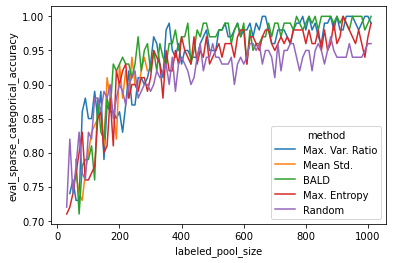

In [19]:
df_mc = MetricsTransformer.load_from_dir(metrics_handler, "mc_dropout", dtype=dtypes)
selector = df_mc["eval_sparse_categorical_accuracy"] > .7
sns.lineplot(data=df_mc[selector], x="labeled_pool_size", y="eval_sparse_categorical_accuracy", hue="method")

In [74]:
df_mc_methods = Frame.split_by(df_mc, "method")

112.5